In [1]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DIR = './'

In [4]:
def load_data(file_name):#, head = 500):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)
            
            # break if reaches the 100th line
            # if (head is not None) and (count > head):
            #     break
    return data

In [5]:
temp1 = load_data(os.path.join(DIR, 'goodreads_books_poetry.json.gz'))
df_book = pd.json_normalize(temp1)
temp2 = load_data(os.path.join(DIR, 'goodreads_interactions_poetry.json.gz'))
df_interact = pd.json_normalize(temp2)
temp3 = load_data(os.path.join(DIR, 'goodreads_reviews_poetry.json.gz'))
df_reviews = pd.json_normalize(temp3)

In [6]:
df_temp = pd.merge(df_book,df_reviews,left_on='book_id',right_on='book_id')[['user_id','title','rating']]

In [7]:
df_user = pd.read_csv('user_id_map.csv')

In [8]:
df = pd.merge(df_temp,df_user,left_on='user_id',right_on='user_id')

In [9]:
column = ['user_id', 'title', 'rating']
for columns in column:
    missing = df[columns].isnull().value_counts()
    print(missing)

False    154555
Name: user_id, dtype: int64
False    154555
Name: title, dtype: int64
False    154555
Name: rating, dtype: int64


In [10]:
# Drops missing values for all columns
df = df.dropna(how='any')

# Remove rows with non-ASCII characters in reviewerName and title column
df = df[~df.user_id.str.contains(r'[^\x00-\x7F]')]
df = df[~df.title.str.contains(r'[^\x00-\x7F]')]

# Resets the index
df = df.reset_index(drop=True)

# Check and see the cleaned data
df.head()

,user_id,title,rating,user_id_csv
0,1c8fa71cff8641eff74571d9b02ef130,Vision of Sir Launfal and Other Poems,4,256407
1,653b2c680e083a2fb826ca564b4c4e37,Fairy Tales: Dramolettes,3,371125
2,653b2c680e083a2fb826ca564b4c4e37,Save Twilight: Selected Poems,5,371125
3,653b2c680e083a2fb826ca564b4c4e37,One Hundred Poems from the Chinese,5,371125
4,653b2c680e083a2fb826ca564b4c4e37,The Seventh Octave: The Early Writings of Saul...,4,371125


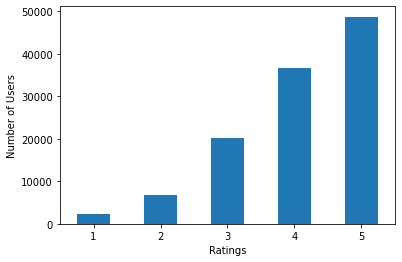

In [57]:
df[df.rating!=0].rating.value_counts().sort_values().plot(kind='bar',rot=0)
plt.xlabel('Ratings')
plt.ylabel('Number of Users')
plt.savefig('Usersperrat.png', facecolor='w',bbox_inches='tight')

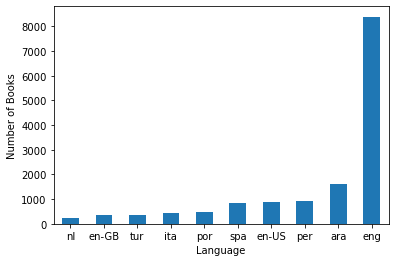

In [56]:
df_book['language_code'].replace('', np.nan).dropna().value_counts().head(10).sort_values().plot(kind='bar',rot=0)
plt.xlabel('Language')
plt.ylabel('Number of Books')
plt.savefig('Booksperlang.png', facecolor='w',bbox_inches='tight')

In [59]:
df_book

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,,1,[],US,eng,"[{'count': '8', 'name': 'to-read'}, {'count': ...",,false,3.83,,...,11,,1887,https://www.goodreads.com/book/show/16037549-v...,https://images.gr-assets.com/books/1348176637m...,16037549,3,5212748,Vision of Sir Launfal and Other Poems,Vision of Sir Launfal and Other Poems
1,0811223981,2,[],US,,"[{'count': '100', 'name': 'to-read'}, {'count'...",,false,3.83,B00U2WY9U8,...,4,,2015,https://www.goodreads.com/book/show/22466716-f...,https://images.gr-assets.com/books/1404958407m...,22466716,37,41905435,Fairy Tales: Dramolettes,Fairy Tales: Dramolettes
2,0374428115,7,[],US,,"[{'count': '32', 'name': 'to-read'}, {'count':...",,false,4.38,,...,7,,2008,https://www.goodreads.com/book/show/926662.Gro...,https://s.gr-assets.com/assets/nophoto/book/11...,926662,45,911665,Growltiger's Last Stand and Other Poems,Growltiger's Last Stand and Other Poems
3,0156182890,12,[],US,,"[{'count': '554', 'name': 'to-read'}, {'count'...",,false,3.71,B00IWTRB1W,...,3,,1964,https://www.goodreads.com/book/show/926667.The...,https://images.gr-assets.com/books/1382939971m...,926667,115,995066,The Cocktail Party,The Cocktail Party
4,1942004192,4,[],US,eng,"[{'count': '228', 'name': 'to-read'}, {'count'...",,false,5.00,,...,12,First,2015,https://www.goodreads.com/book/show/29065952-l...,https://images.gr-assets.com/books/1455198396m...,29065952,9,49294781,Louder Than Everything You Love,Louder Than Everything You Love
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36509,,1,[],US,eng,"[{'count': '2', 'name': 'poetry'}, {'count': '...",B004CYF8NY,true,5.00,,...,,,,https://www.goodreads.com/book/show/9874488-ta...,https://s.gr-assets.com/assets/nophoto/book/11...,9874488,1,14766173,Take Out from the Writer's Café,Take Out from the Writer's Café
36510,,1,[714239],US,,"[{'count': '1158', 'name': 'to-read'}, {'count...",B002LIT2S0,true,3.65,B004UK2JO6,...,,,,https://www.goodreads.com/book/show/7657489-a-...,https://s.gr-assets.com/assets/nophoto/book/11...,7657489,3,854054,A Book of Nonsense,A Book of Nonsense
36511,0879230789,1,[],US,,"[{'count': '3', 'name': 'poetry'}]",,false,3.50,,...,,,,https://www.goodreads.com/book/show/3762261-su...,https://s.gr-assets.com/assets/nophoto/book/11...,3762261,2,3806167,Sunbelly (Number 2 in the First Godine Poetry ...,Sunbelly (Number 2 in the First Godine Poetry ...
36512,,4,[],US,spa,"[{'count': '247044', 'name': 'to-read'}, {'cou...",,false,3.73,B008H3RGCW,...,,,2013,https://www.goodreads.com/book/show/23452091-o...,https://images.gr-assets.com/books/1414353152m...,23452091,55,3356006,Odisea,Odisea


In [18]:
# df1 = df.set_index(['user_id', 'title']).sort_index()
# df1

rating
user_id                          title                                                
000157a6f8331e9c9a21252e1fee91d1 Upstream: Selected Essays                           0
000192962b87d560f00b06fdcbd71681 The Tiny Book of Tiny Stories, Vol. 1               5
0004ae25e3cf5f5a44b6f1ccfdd3d343 The Broken Wings                                    5
                                 The Prophet                                         5
0006a5b8cda1ba6d7b911dc575f6547b Childe Harold's Pilgrimage                          1
...                                                                                ...
fffc34d137f5c5c5e1ca1d6f325a4dcf Steppin' Out: Jaunty Rhymes for Playful Times       3
fffc475c53c2c59e160a4274aec002cf Milk and Honey                                      4
fffcf6da0f39d7ab624e2a8da054d2c3 A Coney Island of the Mind                          4
fffe68bb5313dd3733d25e3097beedf3 Odysseia                                            5
ffff601c0ffa34bd5ffbbf2caee30644 The Ballad of the White Horse                       4

[119991 rows x 1 columns]